## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read in the dataset and view

In [2]:
df = pd.read_csv("train.csv")
df.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df['PassengerId'].nunique()

891

In [7]:
print("No.of.unique values in each column :\n",df.nunique(axis=0))

No.of.unique values in each column :
 PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


## Dealing with null / not useful values
### Age, Cabin, Name, PassengerId

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Missing Values
- A decision is required to determine the best method of dealing with NaN values.
  - The NaN values can be ignored
  - NaN can be filled in with a value, typically a mean

- Comparing the counts for various groups leads to the conclusion, simply using the overall mean will heavily weigh one specific age and skew any age dependant results.
- For the remainder of this analytic process, the NaN values data will be replaced with a mean age based upon Pclass, Survived and Sex.

In [9]:
# Maintain Age and create Age_Fill (populate missing ages)
df['Age_Fill'] = df['Age']

# Populate Age_Fill
df['Age_Fill'] = df['Age_Fill'] \
    .groupby([df['Pclass'], df['Survived'], df['Sex']], group_keys=False) \
    .apply(lambda x: x.fillna(x.mean()))

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_Fill         0
dtype: int64

In [11]:
df = df.drop(columns=['PassengerId','Name', 'Cabin', 'Ticket'], axis=1)

In [12]:
print("No.of.unique values in each column :\n",df.nunique(axis=0))

No.of.unique values in each column :
 Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
Age_Fill     98
dtype: int64


## Create a statistical summary of the dataset  

In [13]:
df.describe

<bound method NDFrame.describe of      Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked   Age_Fill
0           0       3    male  22.0      1      0   7.2500        S  22.000000
1           1       1  female  38.0      1      0  71.2833        C  38.000000
2           1       3  female  26.0      0      0   7.9250        S  26.000000
3           1       1  female  35.0      1      0  53.1000        S  35.000000
4           0       3    male  35.0      0      0   8.0500        S  35.000000
..        ...     ...     ...   ...    ...    ...      ...      ...        ...
886         0       2    male  27.0      0      0  13.0000        S  27.000000
887         1       1  female  19.0      0      0  30.0000        S  19.000000
888         0       3  female   NaN      1      2  23.4500        S  23.818182
889         1       1    male  26.0      0      0  30.0000        C  26.000000
890         0       3    male  32.0      0      0   7.7500        Q  32.000000

[891 rows x 9 col

In [14]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Age_Fill
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.339313
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,13.370271
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,21.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,27.255814
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,36.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000


## Visualizations
### Boxplots

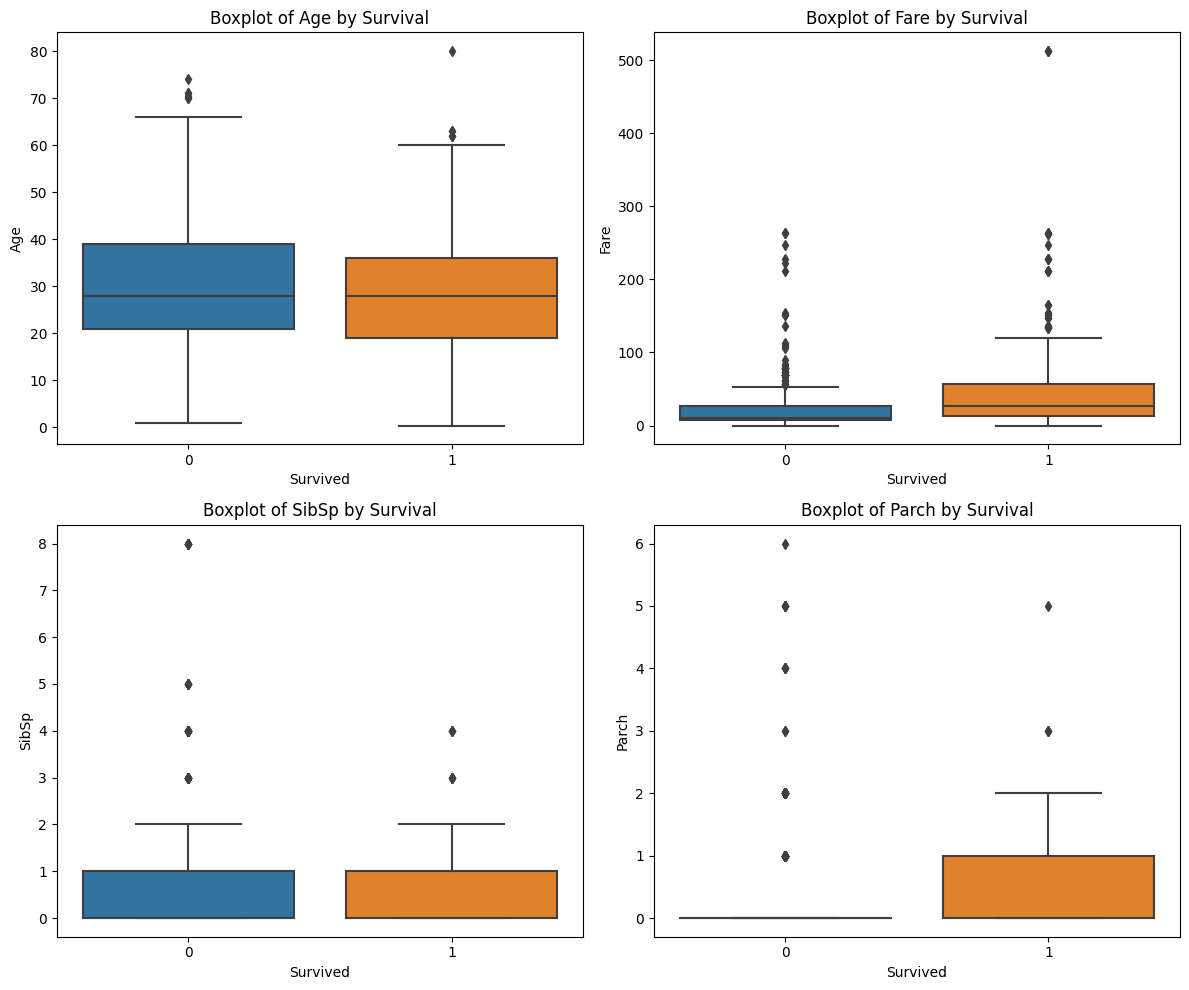

In [123]:
# Select relevant numerical features for boxplots
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch' ]

# Set up the figure and axis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
# fig.subplots_adjust(hspace=.5)

# Create boxplots for each numerical feature
for ax, feature in zip(axes.flatten(), numerical_features):
    sns.boxplot(x='Survived', y=feature, data=df, ax=ax)
    ax.set_xlabel('Survived')
    ax.set_ylabel(feature)
    ax.set_title(f'Boxplot of {feature} by Survival')

# Show the plots
plt.tight_layout()
plt.show()

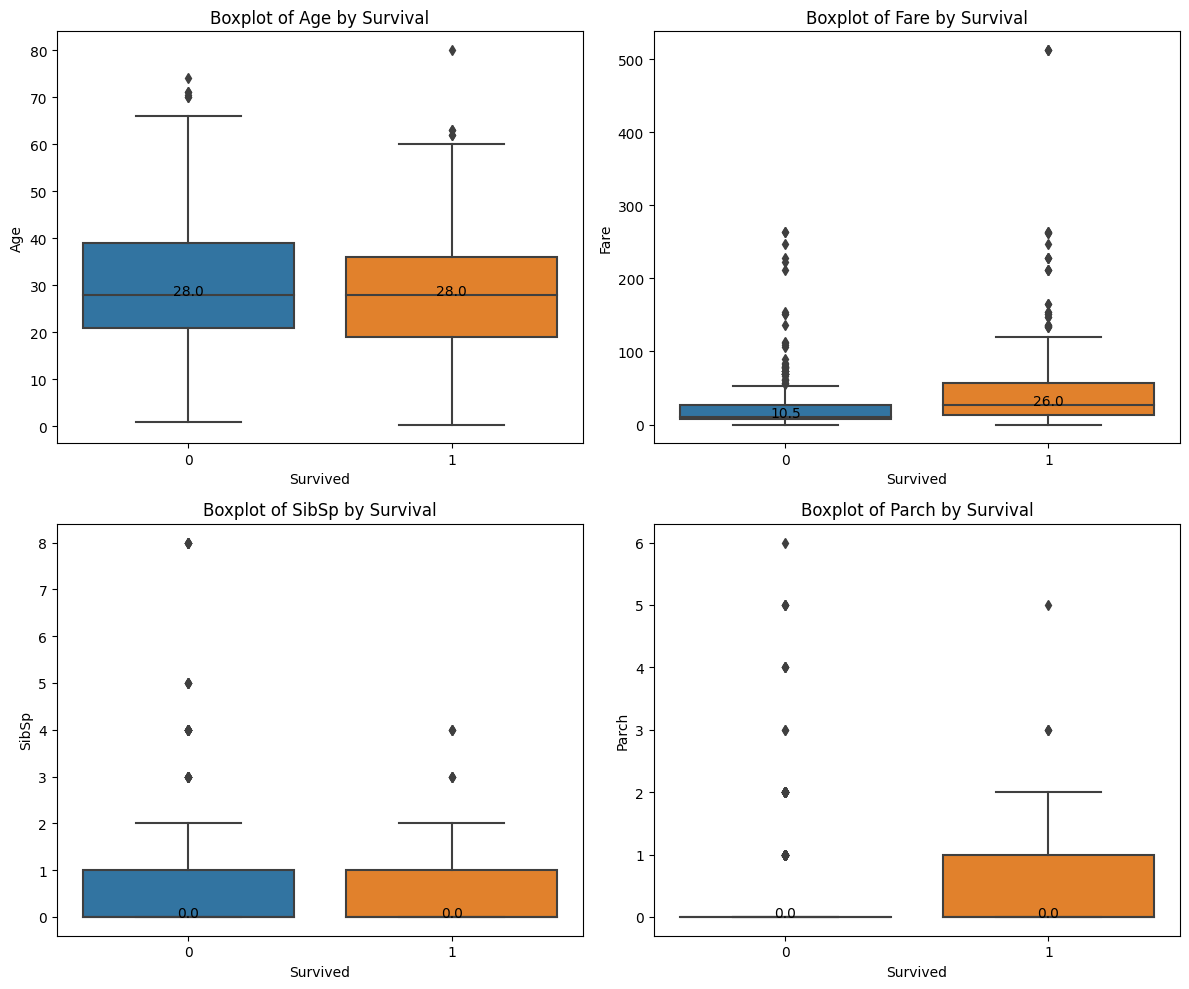

In [124]:
# Set up the figure and axis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

# Create boxplots for each numerical feature
for ax, feature in zip(axes.flatten(), numerical_features):
    sns.boxplot(x='Survived', y=feature, data=df, ax=ax)
    ax.set_xlabel('Survived')
    ax.set_ylabel(feature)
    ax.set_title(f'Boxplot of {feature} by Survival')
    
    # Calculate and add median value
    median_vals = df.groupby('Survived')[feature].median()
    for xtick in ax.get_xticks():
        ax.text(xtick , median_vals[xtick], median_vals[xtick], horizontalalignment='center', size='medium',color='black')
    # xtick: the position to place the text in x axis
    # median_vals[xtick]: the position to place the text in y axis
    # median_vals[xtick]: the text


# Show the plots
plt.tight_layout()
plt.show()

In [17]:
# # Filter the data for survived and not survived passengers
survived_df = df[df['Survived'] == 1]
not_survived_df = df[df['Survived'] == 0]

### Histograms

#### Age distribution

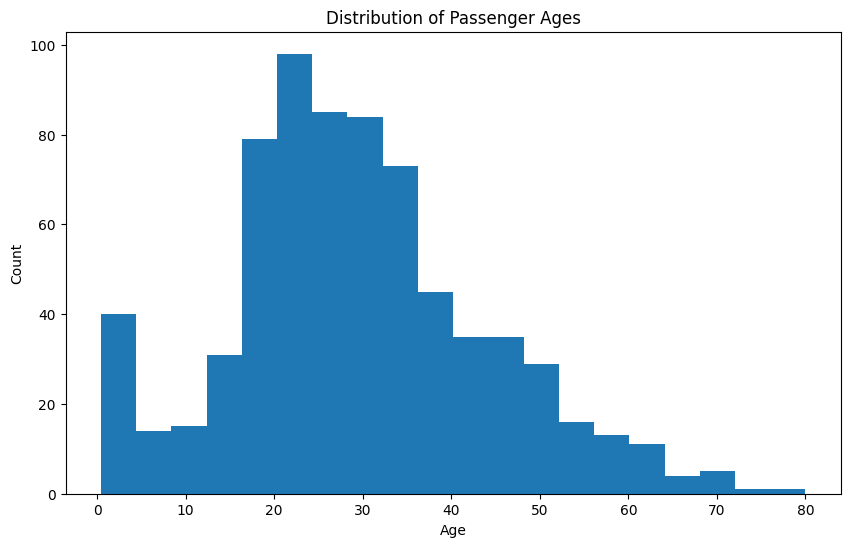

In [18]:
# Example of a histogram
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
# plt.hist(df['Age'].dropna(), bins=20)
plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Passenger Ages')
plt.show()


#### Highlighting Min / Max

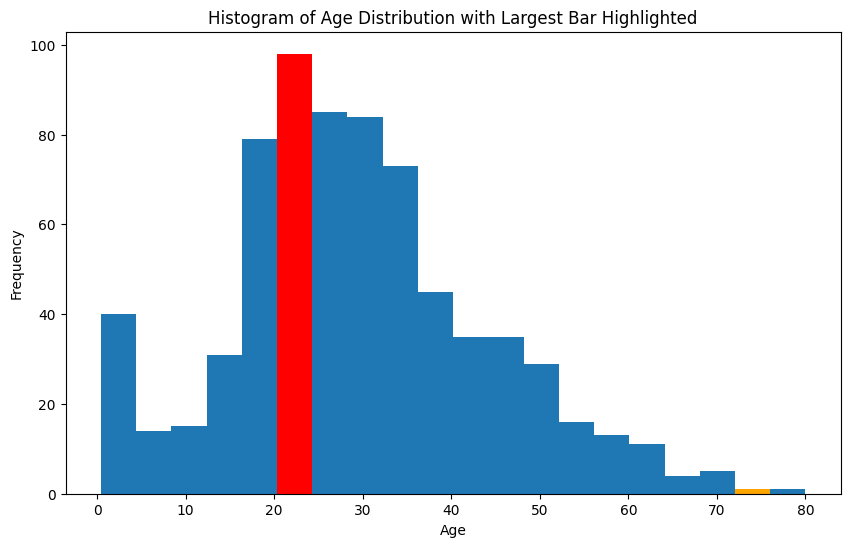

In [19]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the histogram
n, bins, patches = ax.hist(df['Age'], bins=20)

# Find the index of the largest / smallest bar
largest_bar_index = n.argmax()

lowest_bar_index = n.argmin()

# Color the largest bar red
patches[largest_bar_index].set_fc('red')

patches[lowest_bar_index].set_fc('orange')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution with Largest Bar Highlighted')

# Show the plot
plt.show()

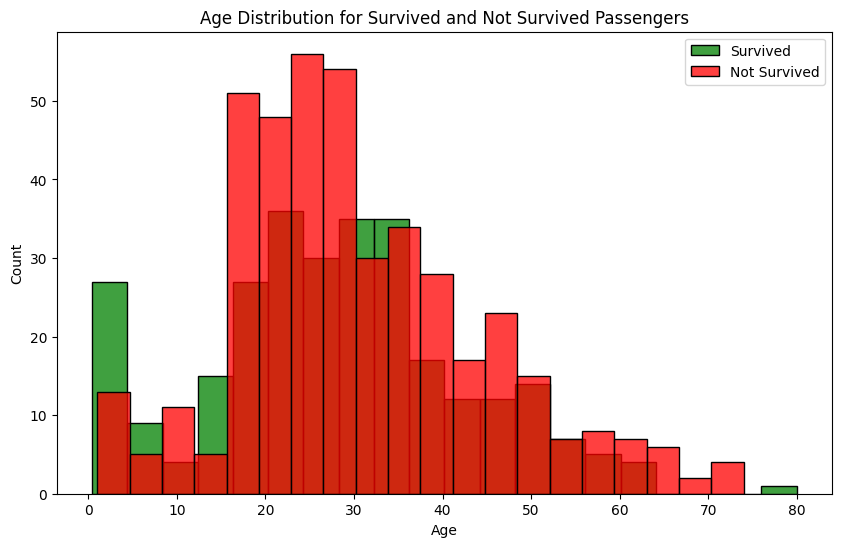

In [127]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram for survived passengers
sns.histplot(survived_df['Age'].dropna(), bins=20, color='green', label='Survived')

# Plot the histogram for not survived passengers
sns.histplot(not_survived_df['Age'].dropna(), bins=20, color='red', label='Not Survived')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution for Survived and Not Survived Passengers')
plt.legend()

# Show the plot
plt.show()

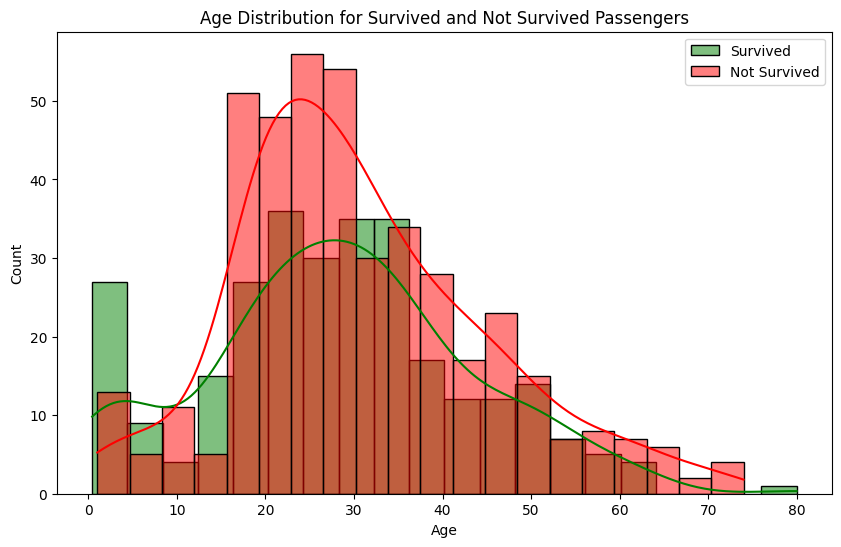

In [125]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram for survived passengers
sns.histplot(survived_df['Age'].dropna(), bins=20, kde=True, color='green', label='Survived')

# Plot the histogram for not survived passengers
sns.histplot(not_survived_df['Age'].dropna(), bins=20, kde=True, color='red', label='Not Survived')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution for Survived and Not Survived Passengers')
plt.legend()

# Show the plot
plt.show()

#### Age Distribution with bins

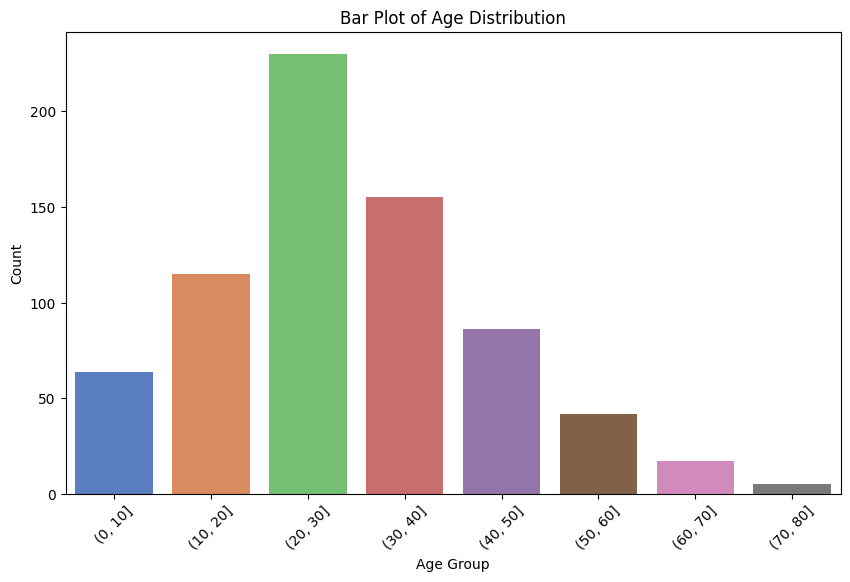

In [128]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Group ages into bins (adjust the bin size as needed)
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_bins = pd.cut(df['Age'], bins=bins)

df['age_bin'] = pd.cut(df['Age'], bins)

# Plot the bar plot for age
sns.countplot(x=df['age_bin'], palette='muted')

# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Bar Plot of Age Distribution')

# Show the plot
plt.xticks(rotation=45)
plt.show()

In [26]:
# # Filter the data for survived and not survived passengers
survived_df = df[df['Survived'] == 1]
not_survived_df = df[df['Survived'] == 0]

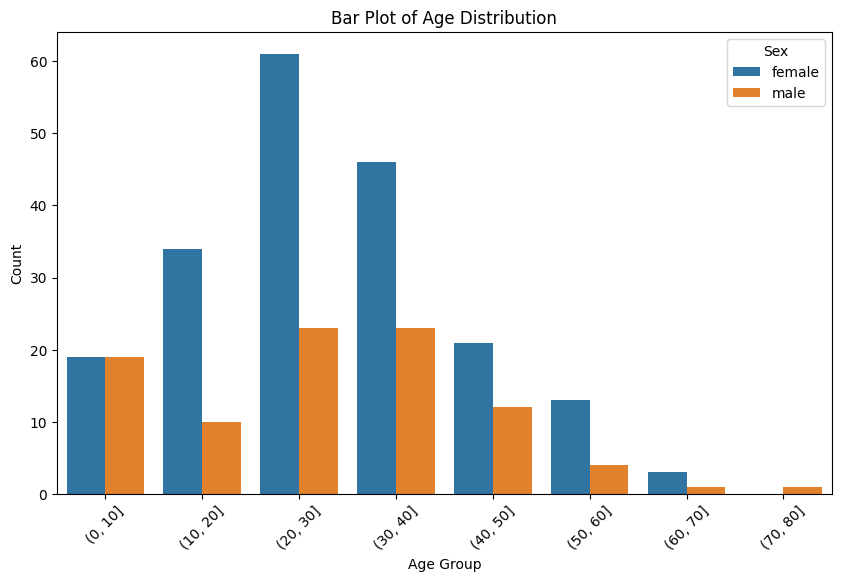

In [27]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar plot for age
sns.countplot(x=survived_df['age_bin'], hue=(survived_df['Sex']))
# sns.countplot(x=not_age_bins)

# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Bar Plot of Age Distribution')

# Show the plot
plt.xticks(rotation=45)
plt.show()

In [55]:
# total_group = df['Pclass'].groupby([pd.cut(df["Age"], np.arange(0, 80, 10)), df['Sex']]).count()
# surv_group = survived_df['Pclass'].groupby([pd.cut(survived_df["Age"], np.arange(0, 80, 10)), survived_df['Sex']]).count()
total_group = df['Pclass'].groupby([df['age_bin'], df['Sex']]).count()
surv_group = survived_df['Pclass'].groupby([survived_df['age_bin'], survived_df['Sex']]).count()
prop_group = surv_group / total_group
prop_group = prop_group.reset_index()
prop_df = pd.DataFrame(prop_group)

In [54]:
# # total_group = df['Pclass'].groupby([pd.cut(df["Age"], np.arange(0, 80, 10)), df['Sex']]).count()
# # surv_group = survived_df['Pclass'].groupby([pd.cut(survived_df["Age"], np.arange(0, 80, 10)), survived_df['Sex']]).count()
# total_group = df['Pclass'].groupby([df['age_bin'], df['Sex']]).count()
# surv_group = survived_df['Pclass'].groupby([survived_df['age_bin'], survived_df['Sex']]).count()
# prop_group = surv_group / total_group
# prop_group.reset_index()

,age_bin,Sex,Pclass
0,"(0, 10]",female,0.612903
1,"(0, 10]",male,0.575758
2,"(10, 20]",female,0.739130
3,"(10, 20]",male,0.144928
4,"(20, 30]",female,0.753086
5,"(20, 30]",male,0.154362
6,"(30, 40]",female,0.836364
7,"(30, 40]",male,0.230000
8,"(40, 50]",female,0.677419
9,"(40, 50]",male,0.218182


In [56]:
prop_df

,age_bin,Sex,Pclass
0,"(0, 10]",female,0.612903
1,"(0, 10]",male,0.575758
2,"(10, 20]",female,0.739130
3,"(10, 20]",male,0.144928
4,"(20, 30]",female,0.753086
5,"(20, 30]",male,0.154362
6,"(30, 40]",female,0.836364
7,"(30, 40]",male,0.230000
8,"(40, 50]",female,0.677419
9,"(40, 50]",male,0.218182


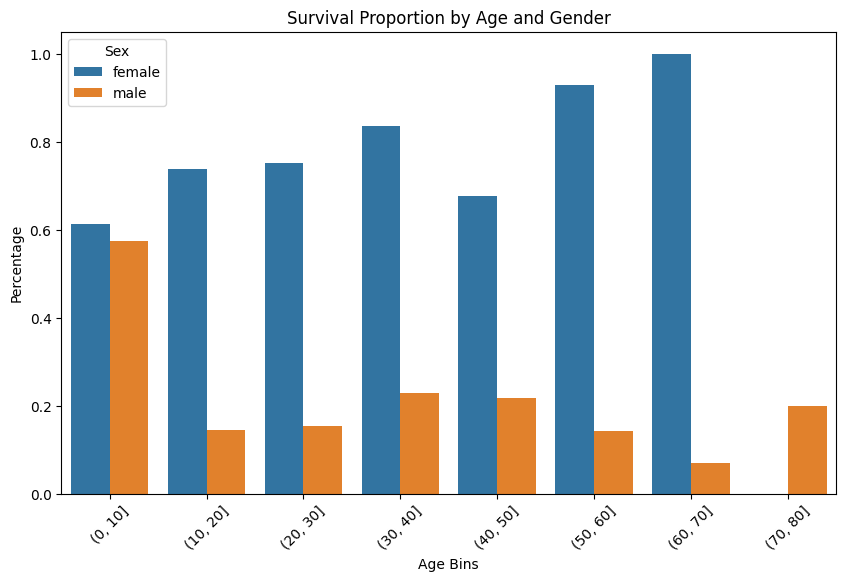

In [57]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot
sns.barplot(x='age_bin', y='Pclass', hue='Sex', data=prop_df, ax=ax)

# Set labels and title
ax.set_xlabel('Age Bins')
ax.set_ylabel('Percentage')
ax.set_title('Survival Proportion by Age and Gender')

# Show the plot
plt.xticks(rotation=45)
plt.show()

#### Gender Distribution

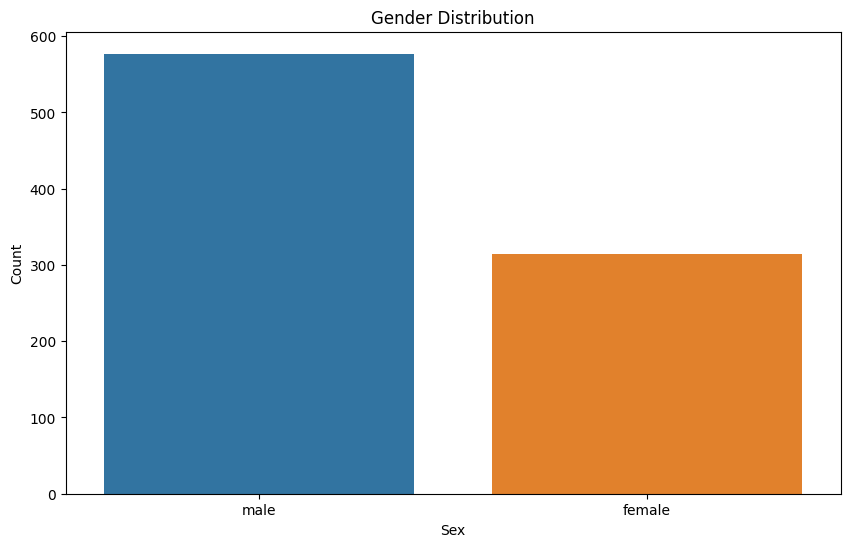

In [31]:
# Example of a bar plot
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='Sex', data=df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Gender Distribution')
# plt.legend()
plt.show()

#### Gender Distribution with Secondary Categories

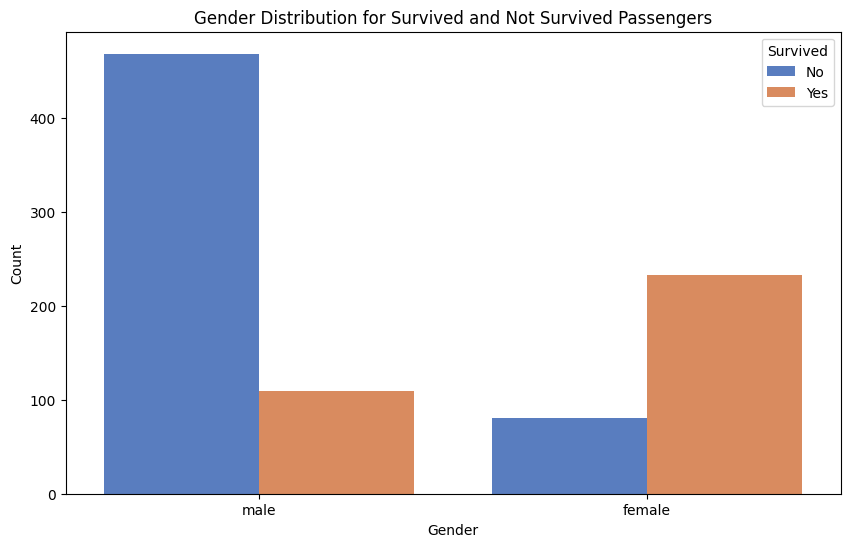

In [32]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar plot for gender distribution
sns.countplot(x='Sex', hue='Survived', data=df, palette='muted')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution for Survived and Not Survived Passengers')

# Show the plot
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [47]:
# Group the data by gender and include survival outcome
gender_group = df[['Sex', 'Survived']].groupby('Sex')

# Aggregate the count of survival and the total for the demographic
gender_agg = gender_group.agg(['sum', 'count'])['Survived']

# Calculate the rate of survival for each group
gender_agg['rate'] = gender_agg.apply(lambda row: row['sum'] / row['count'], axis=1)
gender_agg

,sum,count,rate
Sex,,,
female,233,314,0.742038
male,109,577,0.188908


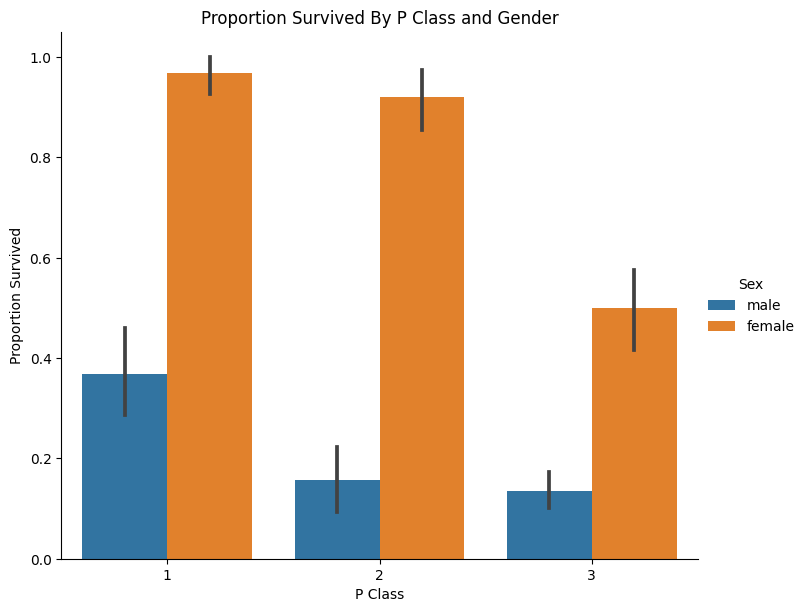

In [33]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='bar', data=df, height=6, aspect=1.2,)
# Set labels and title
plt.xlabel('P Class')
plt.ylabel('Proportion Survived')
plt.title('Proportion Survived By P Class and Gender')

# Show the plot
plt.show()

#### Scatterplot with Two Numerical Quantities

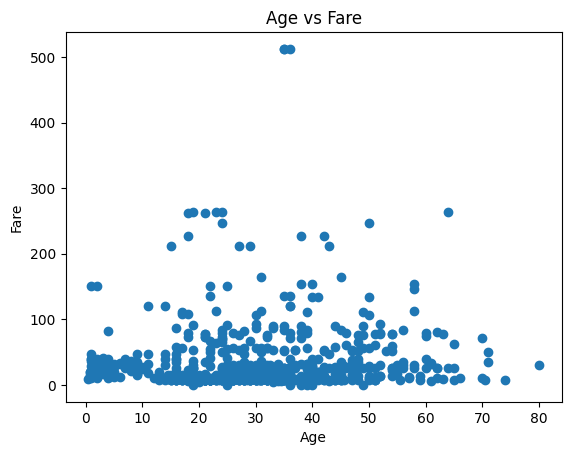

In [34]:
# Example of a scatter plot
plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
# plt.legend()
plt.show()

#### Scatterplot with Two quantities by outcome

In [35]:
# Filter the data for survived and not survived passengers
# survived_df = df[df['Survived'] == 1]
# not_survived_df = df[df['Survived'] == 0]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


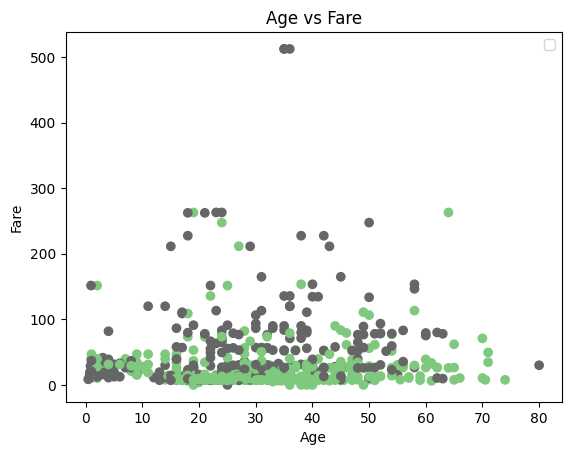

In [97]:
# Example of a scatter plot
# plt.scatter(survived_df['Age'], survived_df['Fare'], color=color1, label="Survived")
# plt.scatter(not_survived_df['Age'], not_survived_df['Fare'], color=color3, label="Did Not Survive")
plt.scatter(df['Age'], df['Fare'], c=df['Survived'], cmap=('Accent'))
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.legend()
plt.show()

In [110]:
# Add multiple iterations
# assign colors using color codes
color1 = (0.66, 0.34, 0.15, 1.0)
color2 = (0.65, 0.80, 0.89, 1.0)

i1 = 1 / 255
i2 = 133 / 255
i3 = 113 / 255
color3 = (i1,i2,i3)

j1 = 166 / 255
j2 = 97 / 255
j3 = 26 / 255
color4 = (j1,j2,j3)

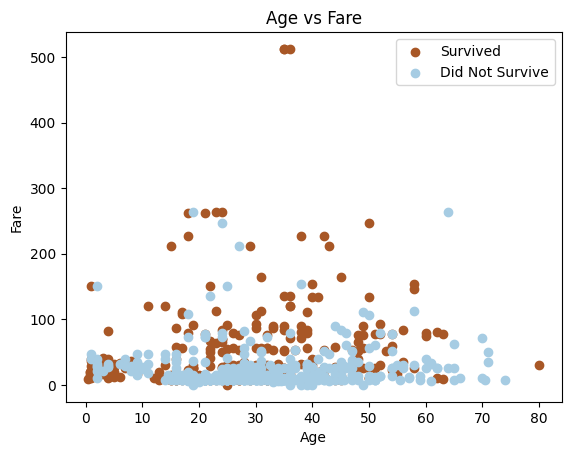

In [111]:
# Example of a scatter plot
plt.scatter(survived_df['Age'], survived_df['Fare'], color=color1, label="Survived")
plt.scatter(not_survived_df['Age'], not_survived_df['Fare'], color=color2, label="Did Not Survive")
# plt.scatter(df['Age'], df['Fare'], c=df['Survived'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.legend()
plt.show()

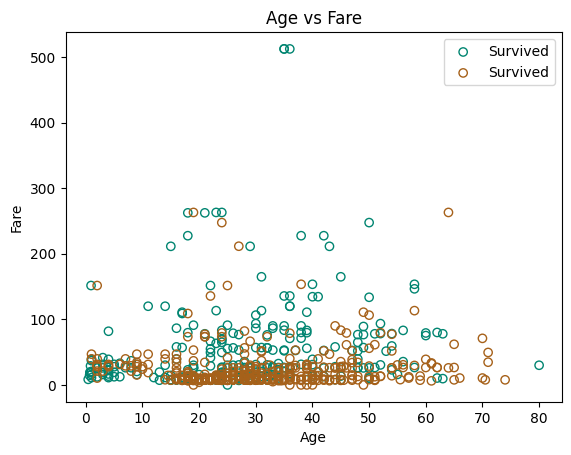

In [112]:
# Example of a scatter plot
plt.scatter(survived_df['Age'], survived_df['Fare'], facecolors='none', edgecolors=color3, label="Survived")
plt.scatter(not_survived_df['Age'], not_survived_df['Fare'], facecolors='none', edgecolors=color4, label="Survived")
# plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.legend()
plt.show()

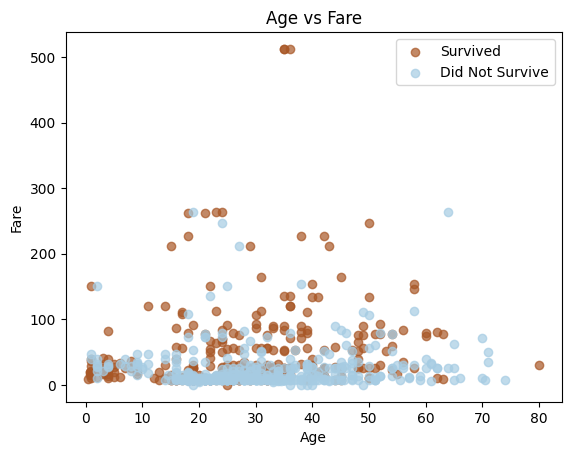

In [113]:
# Example of a scatter plot
plt.scatter(survived_df['Age'], survived_df['Fare'], color=color1, label="Survived", alpha=.7)
plt.scatter(not_survived_df['Age'], not_survived_df['Fare'], color=color2, label="Did Not Survive", alpha=.7)
# plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.legend()
plt.show()

#### Stacked Bar Plots

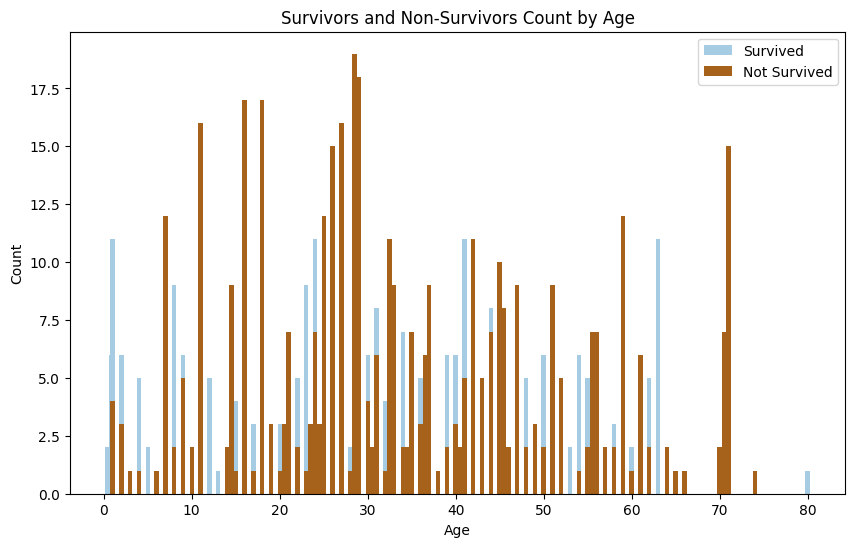

In [116]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate the count of survivors and non-survivors for each age group
survived_counts = survived_df['Age'].value_counts().sort_index()
not_survived_counts = not_survived_df['Age'].value_counts().sort_index()

# Get unique age values for the x-axis
age_values = survived_df['Age'].dropna().unique()
bad_age_values = not_survived_df['Age'].dropna().unique()

# Set the width of the bars
bar_width = 0.5

# Plot the bar chart for survivors
ax.bar(age_values, survived_counts, width=bar_width, label='Survived', align='center', color=color2)

# Plot the bar chart for non-survivors next to the survivors' bars
ax.bar(bad_age_values, not_survived_counts, width=bar_width, label='Not Survived', align='center', color=color4)

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Survivors and Non-Survivors Count by Age')
ax.legend()

# Show the plot
plt.show()

#### Densities for Different SubGroups

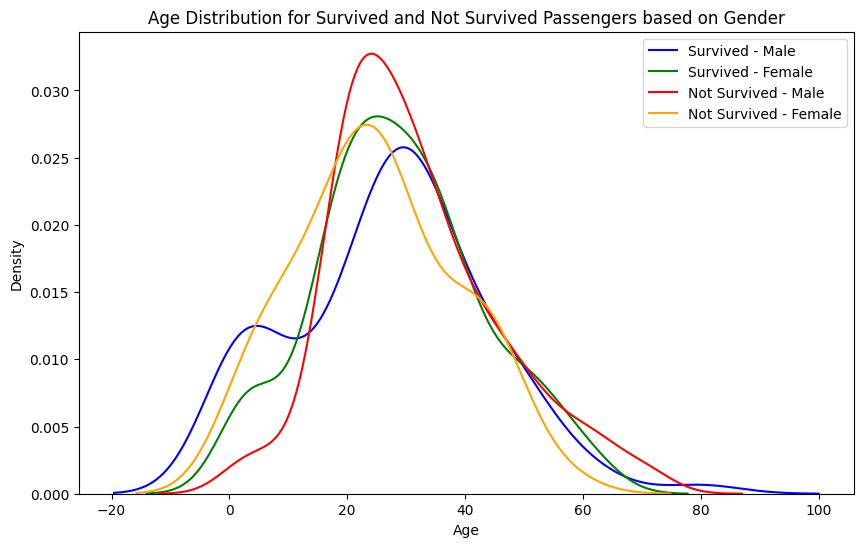

In [39]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the distribution curve for survived male passengers
sns.kdeplot(data=survived_df[survived_df['Sex'] == 'male']['Age'], color='blue', label='Survived - Male')
# sns.kdeplot(data=survived_df[survived_df['Sex'] == 'male']['Age'], color='blue', label='Survived - Male', shade=True)

# Plot the distribution curve for survived female passengers
sns.kdeplot(data=survived_df[survived_df['Sex'] == 'female']['Age'], color='green', label='Survived - Female')
# sns.kdeplot(data=survived_df[survived_df['Sex'] == 'female']['Age'], color='green', label='Survived - Female', shade=True)

# Plot the distribution curve for not survived male passengers
sns.kdeplot(data=not_survived_df[not_survived_df['Sex'] == 'male']['Age'], color='red', label='Not Survived - Male')
# sns.kdeplot(data=not_survived_df[not_survived_df['Sex'] == 'male']['Age'], color='red', label='Not Survived - Male', shade=True)

# Plot the distribution curve for not survived female passengers
sns.kdeplot(data=not_survived_df[not_survived_df['Sex'] == 'female']['Age'], color='orange', label='Not Survived - Female')
# sns.kdeplot(data=not_survived_df[not_survived_df['Sex'] == 'female']['Age'], color='orange', label='Not Survived - Female', shade=True)

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution for Survived and Not Survived Passengers based on Gender')
plt.legend()

# Show the plot
plt.show()


#### Pairplot for Quantitative Features

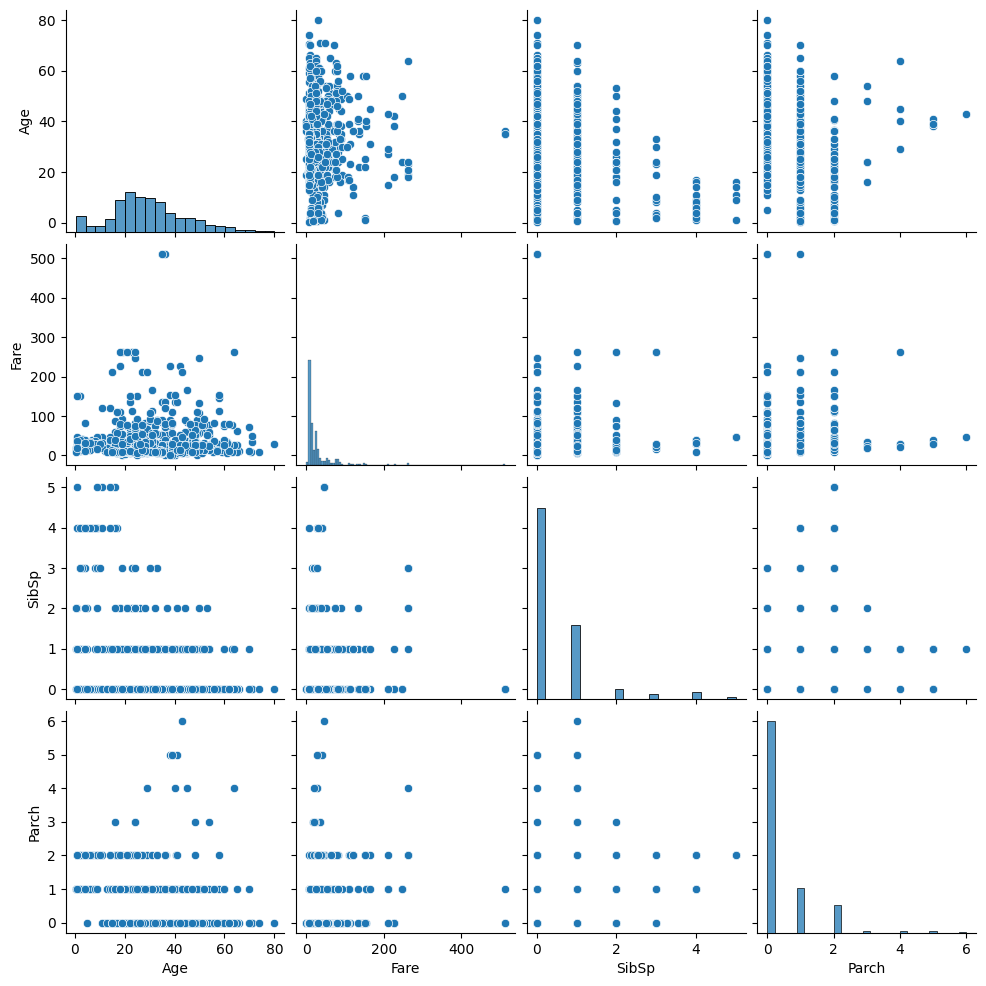

In [42]:
# Select numerical features for the pair plot
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

# Filter out rows with missing values in numerical features
numerical_data = df[numerical_features].dropna()

# Create a pair plot
sns.pairplot(numerical_data)

# Show the plot
plt.show()

#### Correlations

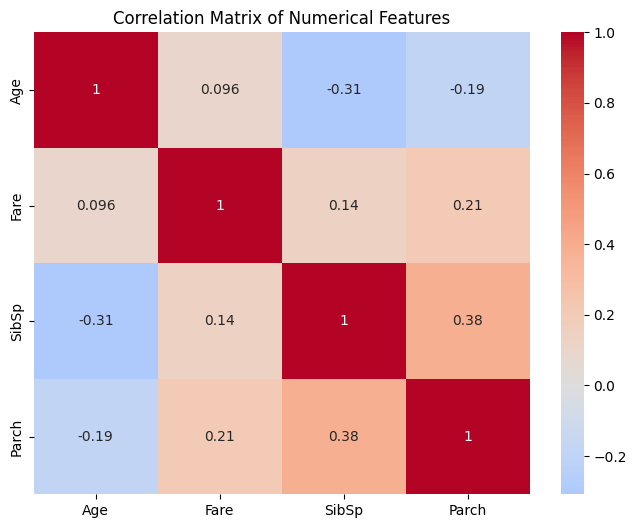

In [43]:
# Select numerical features for correlation analysis
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

# Filter out rows with missing values in numerical features
numerical_data = df[numerical_features].dropna()

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Set up the figure and axis
plt.figure(figsize=(8, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Set title
plt.title('Correlation Matrix of Numerical Features')

# Show the plot
plt.show()

In [44]:
ohe_df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
ohe_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Age_Fill,age_bin,Sex_male
0,0,3,22.0,1,0,7.2500,S,22.0,"(20, 30]",1
1,1,1,38.0,1,0,71.2833,C,38.0,"(30, 40]",0
2,1,3,26.0,0,0,7.9250,S,26.0,"(20, 30]",0
3,1,1,35.0,1,0,53.1000,S,35.0,"(30, 40]",0
4,0,3,35.0,0,0,8.0500,S,35.0,"(30, 40]",1


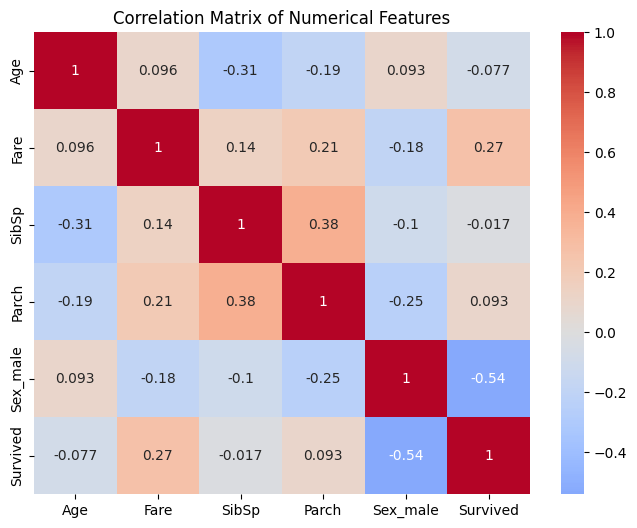

In [45]:
# Select numerical features for correlation analysis
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch', 'Sex_male', 'Survived']

# Filter out rows with missing values in numerical features
numerical_data = ohe_df[numerical_features].dropna()

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Set up the figure and axis
plt.figure(figsize=(8, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Set title
plt.title('Correlation Matrix of Numerical Features')

# Show the plot
plt.show()

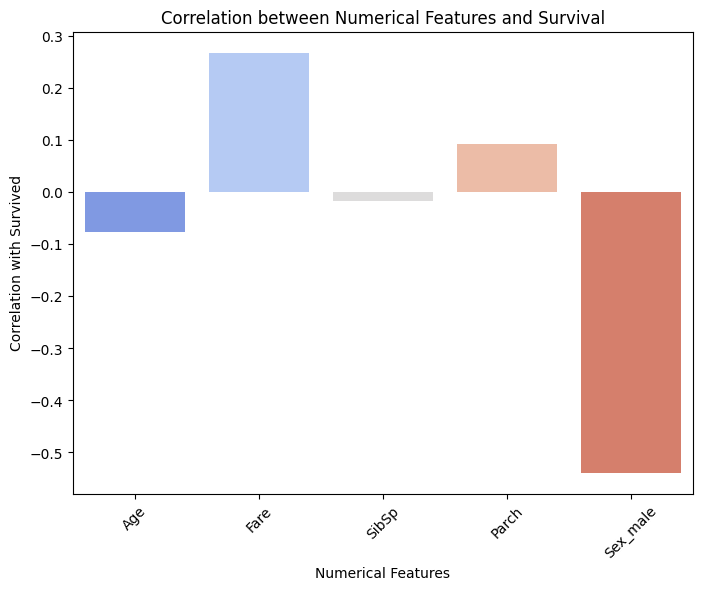

In [46]:
# Select numerical features for correlation analysis
# numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch', 'Sex_male']

# Filter out rows with missing values in numerical features
numerical_data = ohe_df[numerical_features].dropna()

# Calculate the correlation matrix between numerical features and 'Survived'
correlation_matrix = numerical_data.corrwith(df['Survived'])

# Set up the figure and axis
plt.figure(figsize=(8, 6))

# Create a bar plot of correlations
sns.barplot(x=correlation_matrix.index, y=correlation_matrix.values, palette='coolwarm')

# Set labels and title
plt.xlabel('Numerical Features')
plt.ylabel('Correlation with Survived')
plt.title('Correlation between Numerical Features and Survival')

# Show the plot
plt.xticks(rotation=45)
plt.show()

#### Regression (Not as applicable in this specific case, but worth reviewing)

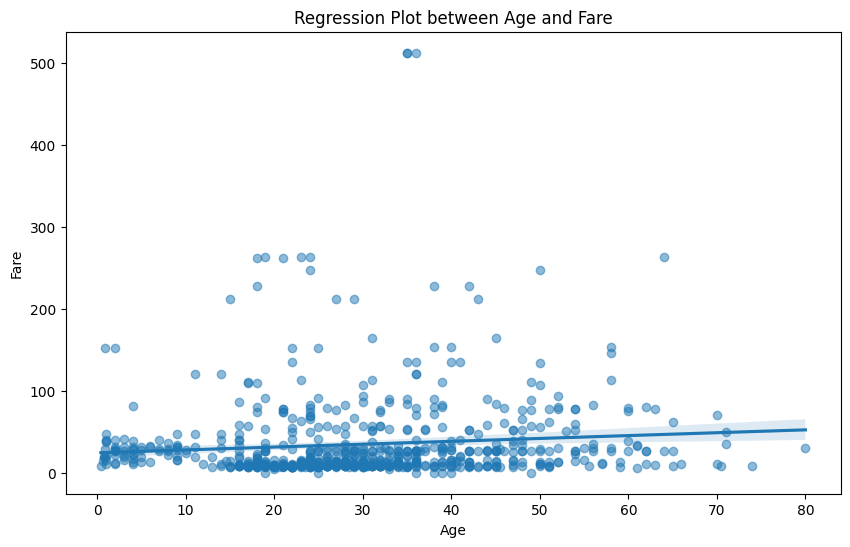

In [48]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a regression plot between 'Age' and 'Fare'
sns.regplot(x='Age', y='Fare', data=df, scatter_kws={'alpha':0.5}, ax=ax)

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Regression Plot between Age and Fare')

# Show the plot
plt.show()

#### Strip Plot

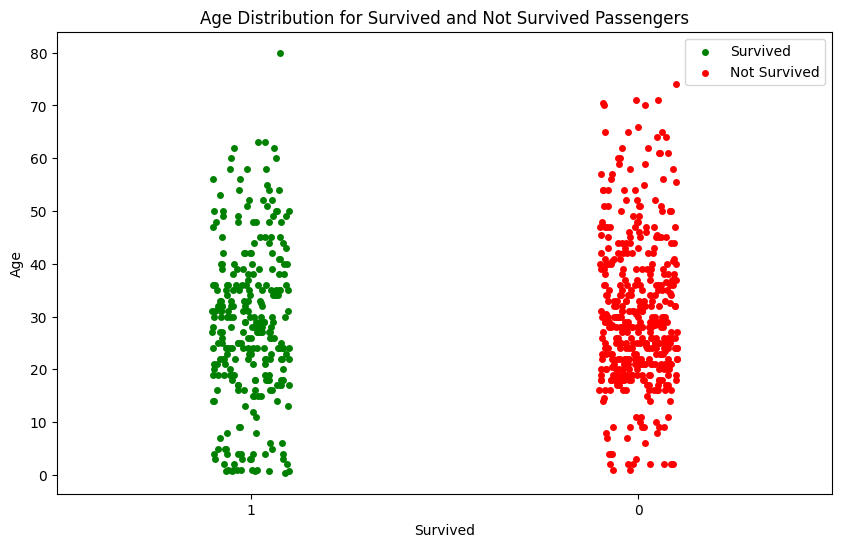

In [40]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the strip plot for survived passengers
sns.stripplot(x='Survived', y='Age', data=survived_df, jitter=True, color='green', label='Survived')

# Plot the strip plot for not survived passengers
sns.stripplot(x='Survived', y='Age', data=not_survived_df, jitter=True, color='red', label='Not Survived')

# Set labels and title
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Age Distribution for Survived and Not Survived Passengers')
plt.legend()

# Show the plot
plt.show()

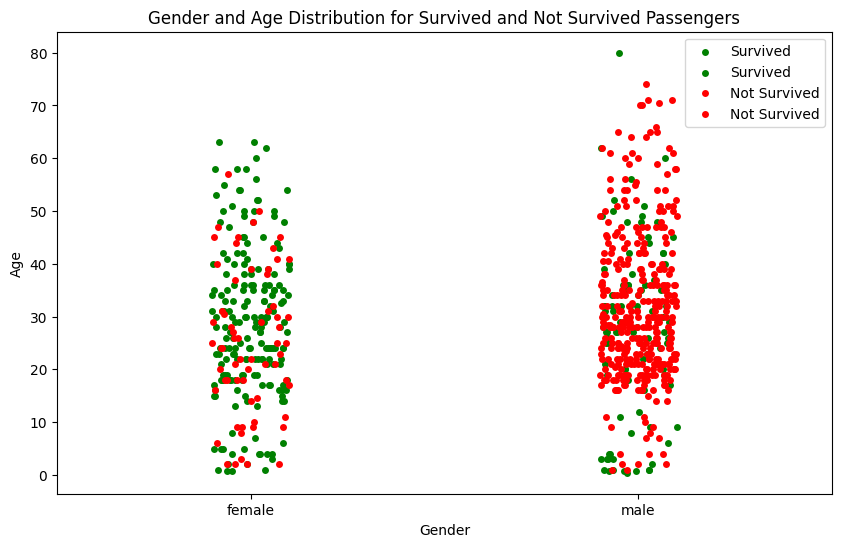

In [41]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the strip plot for survived passengers
sns.stripplot(x='Sex', y='Age', data=survived_df, jitter=True, color='green', label='Survived')

# Plot the strip plot for not survived passengers
sns.stripplot(x='Sex', y='Age', data=not_survived_df, jitter=True, color='red', label='Not Survived')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Gender and Age Distribution for Survived and Not Survived Passengers')
plt.legend()

# Show the plot
plt.show()

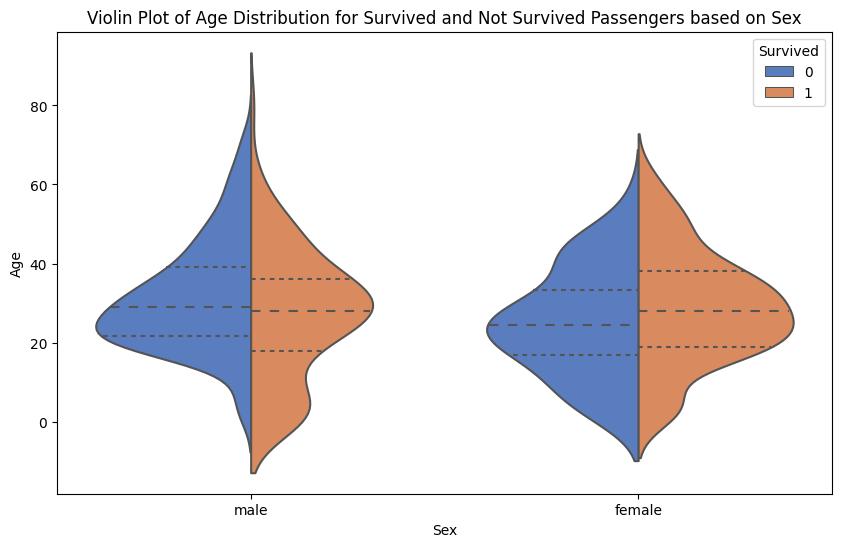

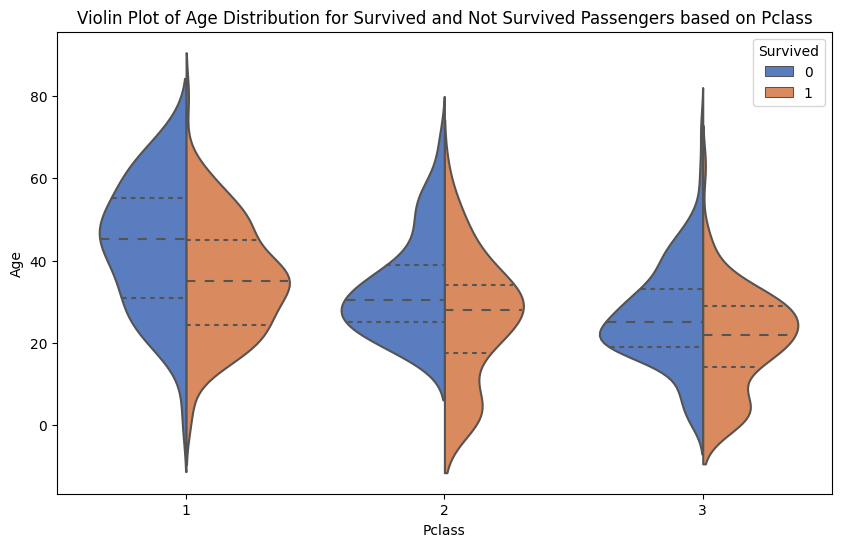

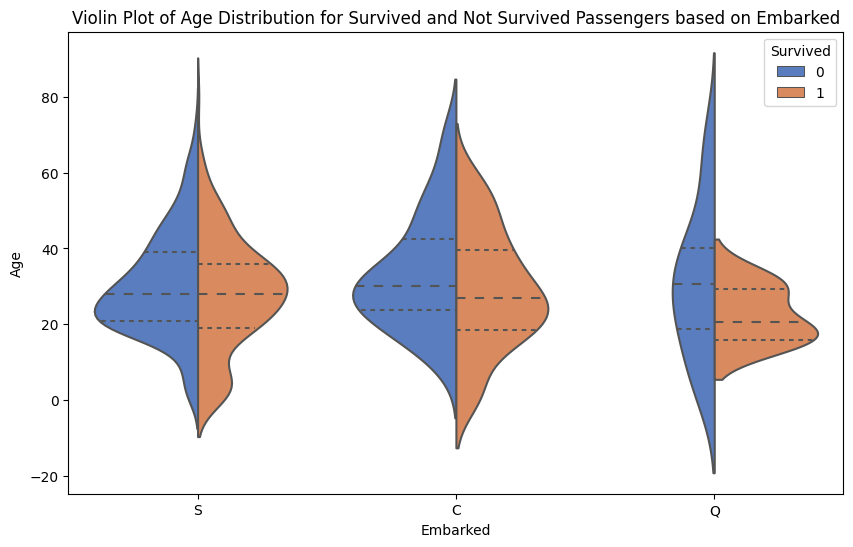

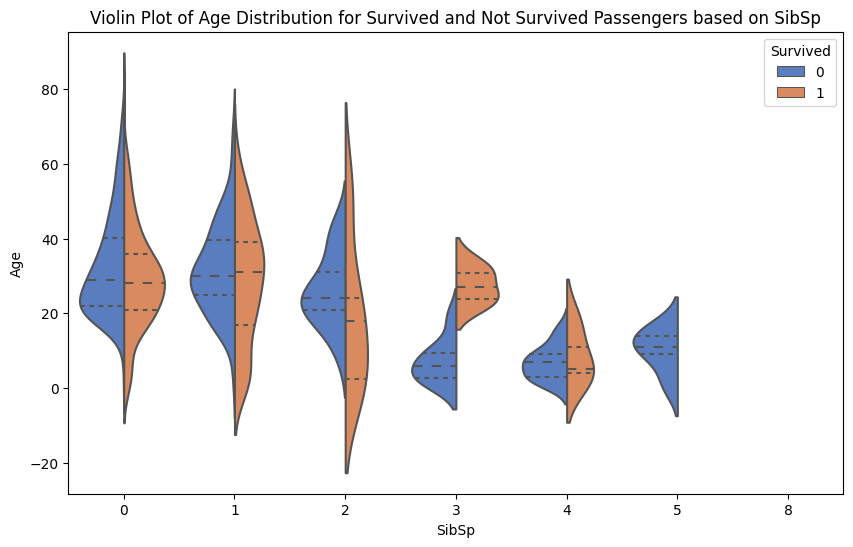

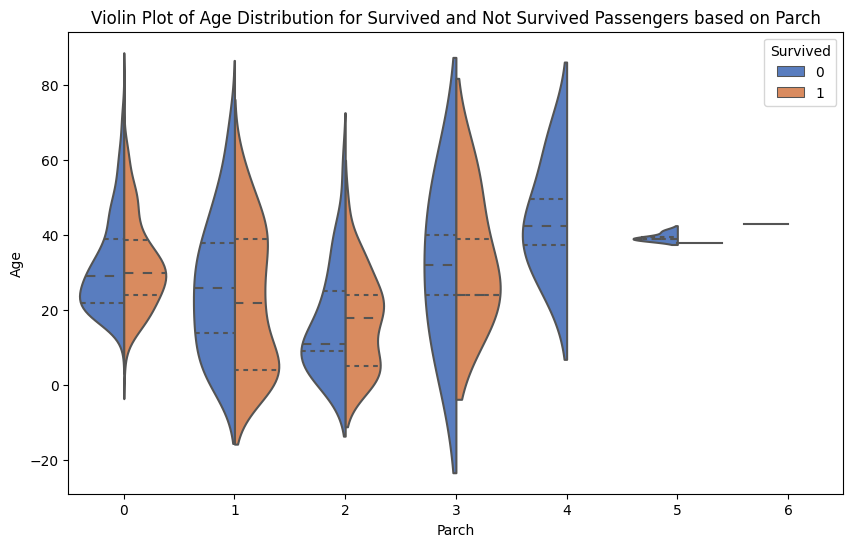

In [49]:
# List of categorical variables in the Titanic dataset
categorical_variables = ['Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch']

# Loop through each categorical variable and create violin plots
for variable in categorical_variables:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot the violin plot for the current variable
    sns.violinplot(x=variable, y='Age', hue='Survived', data=df, split=True, inner='quart', palette='muted')
    
    # Set labels and title
    plt.xlabel(variable)
    plt.ylabel('Age')
    plt.title(f'Violin Plot of Age Distribution for Survived and Not Survived Passengers based on {variable}')
    
    # Show the plot
    plt.legend(title='Survived')
    plt.show()